#**importing neccessary packages**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df


ModuleNotFoundError: No module named 'pandas'

In [ ]:
df=df.replace('Male',1)
df=df.replace('Female',0)
df=df.replace("Other",2)
df=df.replace('Yes',1)
df=df.replace('No',0)
df=df.replace('Urban',1)
df=df.replace('Rural',0)
df=df.replace('Private',1)
df=df.replace('Self-employed',0)
df=df.replace('Govt_job',2)
df=df.replace('children',3)
df=df.replace('Never_worked',4)
df=df.replace('formerly smoked',0)
df=df.replace('never smoked',1)
df=df.replace('smokes',2)
df=df.replace('Unknown',3)

df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
x=MaxAbsScaler()

In [ ]:
for j in df.columns:
  print(j,'-',df[j].unique())

id - [ 9046 51676 31112 ... 19723 37544 44679]
gender - [1 0 2]
age - [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1.48e+00 5.60e-01

In [ ]:
df.dropna(axis=0,how='any',inplace=True)
df.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [ ]:
x=df.drop(['id','stroke'],axis=1)
y=df['stroke']
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,1,1,228.69,36.6,0
2,1,80.0,0,1,1,1,0,105.92,32.5,1
3,0,49.0,0,0,1,1,1,171.23,34.4,2
4,0,79.0,1,0,1,0,0,174.12,24.0,1
5,1,81.0,0,0,1,1,1,186.21,29.0,0
...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,3,0,103.08,18.6,3
5106,0,81.0,0,0,1,0,1,125.20,40.0,1
5107,0,35.0,0,0,1,0,0,82.99,30.6,1
5108,1,51.0,0,0,1,1,0,166.29,25.6,0


In [ ]:
y

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4909, dtype: int64

#**Spliting Dataset into Test and train**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

#**Algorithm**

In [ ]:
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
st_x= StandardScaler()
st_y=MaxAbsScaler()
x_train1=st_y.fit(x_train)
x_train=x_train1.transform(x_train)
x_test1=st_y.fit(x_test)
x_test=x_test1.transform(x_test)

In [ ]:
'''# example of grid searching key hyperparametres for KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)'''

Best: 0.956286 using {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.926235 (0.008633) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.926235 (0.008633) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.946014 (0.006914) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.939987 (0.006927) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.953483 (0.003731) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.950003 (0.003871) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.955097 (0.002978) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.952635 (0.003059) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.956286 (0.002078) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.954419 (0.002812) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.955437 (

In [ ]:
from sklearn.linear_model import LogisticRegression
a=LogisticRegression(C=1.0,penalty='l2',solver='newton-cg')
a.fit(x_train,y_train)
y_pred1=a.predict(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
b=KNeighborsClassifier(metric= 'euclidean', n_neighbors= 11, weights= 'uniform')
b.fit(x_train,y_train)
y_pred2=b.predict(x_test)

In [ ]:
# example of grid searching key hyperparametres for KNeighborsClassifier
'''from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# define models and parameters
model = DecisionTreeClassifier()
splitter=['best','random']
max_features = ['sqrt', 'log2']
criterion=['gini','entropy','log_loss']
class_weight=['balanced','balanced_subsample']
# define grid search
grid = dict(splitter=splitter,max_features=max_features,criterion=criterion,class_weight=class_weight)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))'''

Best: 0.927085 using {'class_weight': 'balanced', 'criterion': 'log_loss', 'max_features': 'sqrt', 'splitter': 'best'}
0.923353 (0.010455) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'best'}
0.920636 (0.011198) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'random'}
0.923351 (0.007091) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'log2', 'splitter': 'best'}
0.921397 (0.012238) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'log2', 'splitter': 'random'}
0.924538 (0.009889) with: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}
0.920718 (0.010545) with: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'random'}
0.926406 (0.010914) with: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'log2', 'splitter': 'best'}
0.920718 (0.012078) with: 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

In [ ]:
from sklearn.tree import DecisionTreeClassifier
c=DecisionTreeClassifier(class_weight= 'balanced', criterion= 'log_loss', max_features= 'sqrt', splitter= 'best')
c.fit(x_train,y_train)
y_pred3=c.predict(x_test)

In [ ]:
'''# example of grid searching key hyperparametres for KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PowerTransformer
# define models and parameters
model = GaussianNB()
var_smoothing=np.logspace(0,-9, num=100)
# define grid search
grid = dict(var_smoothing=var_smoothing)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
Data_transformed = PowerTransformer().fit_transform(x_train)
grid_result = grid_search.fit(Data_transformed, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))'''

Best: 0.928356 using {'var_smoothing': 1.0}
0.928356 (0.007550) with: {'var_smoothing': 1.0}
0.923943 (0.008432) with: {'var_smoothing': 0.8111308307896871}
0.919020 (0.007755) with: {'var_smoothing': 0.657933224657568}
0.911466 (0.010362) with: {'var_smoothing': 0.533669923120631}
0.903232 (0.010673) with: {'var_smoothing': 0.43287612810830584}
0.896781 (0.010755) with: {'var_smoothing': 0.3511191734215131}
0.892707 (0.011547) with: {'var_smoothing': 0.2848035868435802}
0.890924 (0.011922) with: {'var_smoothing': 0.23101297000831597}
0.889396 (0.011205) with: {'var_smoothing': 0.1873817422860384}
0.887953 (0.011682) with: {'var_smoothing': 0.15199110829529336}
0.886510 (0.011590) with: {'var_smoothing': 0.12328467394420659}
0.885576 (0.011634) with: {'var_smoothing': 0.1}
0.885745 (0.011997) with: {'var_smoothing': 0.08111308307896872}
0.885406 (0.012089) with: {'var_smoothing': 0.0657933224657568}
0.885237 (0.011979) with: {'var_smoothing': 0.0533669923120631}
0.885152 (0.011968) wit

In [ ]:
from sklearn.naive_bayes import GaussianNB
d=GaussianNB(var_smoothing= 1.0)
d.fit(x_train,y_train)
y_pred4=d.predict(x_test)


In [ ]:
'''# example of grid searching key hyperparameters for RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
criterion=['gini','entropy','log_loss']
class_weight=['balanced','balanced_subsample']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features,criterion=criterion,class_weight=class_weight)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))'''

Best: 0.956626 using {'class_weight': 'balanced', 'criterion': 'log_loss', 'max_features': 'log2', 'n_estimators': 1000}
0.955267 (0.002343) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 10}
0.956286 (0.001480) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}
0.956371 (0.001262) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 1000}
0.955353 (0.002510) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 10}
0.956201 (0.001368) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100}
0.956371 (0.001078) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 1000}
0.954927 (0.003028) with: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 10}
0.956625 (0.001035) with: {'cl

In [ ]:
from sklearn.ensemble import RandomForestClassifier
e=RandomForestClassifier(class_weight= 'balanced', criterion= 'entropy', max_features= 'sqrt', n_estimators=100)
e.fit(x_train,y_train)
y_pred5=e.predict(x_test)

In [ ]:
from xgboost import XGBClassifier
f=XGBClassifier()
f.fit(x_train,y_train)
y_pred6=f.predict(x_test)

In [ ]:
'''# example of grid searching key hyperparametres for SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid','linear']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
class_weight=['dict','balanced']
decision_function_shape=['ovo', 'ovr']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma,class_weight=class_weight,decision_function_shape=decision_function_shape)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))'''

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1200 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

Best: 0.807144 using {'C': 50, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}
0.000000 (0.000000) with: {'C': 50, 'class_weight': 'dict', 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'poly'}
0.000000 (0.000000) with: {'C': 50, 'class_weight': 'dict', 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}
0.000000 (0.000000) with: {'C': 50, 'class_weight': 'dict', 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'sigmoid'}
0.000000 (0.000000) with: {'C': 50, 'class_weight': 'dict', 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'linear'}
0.000000 (0.000000) with: {'C': 50, 'class_weight': 'dict', 'decision_function_shape': 'ovr', 'gamma': 'scale', 'kernel': 'poly'}
0.000000 (0.000000) with: {'C': 50, 'class_weight': 'dict', 'decision_function_shape': 'ovr', 'gamma': 'scale', 'kernel': 'rbf'}
0.000000 (0.000000) with: {'C': 50, 'class_weight': 'dict', 'decision_function_shape': 'o

In [ ]:
from sklearn.svm import SVC
h= SVC(C= 50, class_weight= 'balanced', decision_function_shape= 'ovo', gamma= 'scale', kernel= 'rbf')
h.fit(x_train,y_train)
y_pred7=h.predict(x_test)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
AC=AdaBoostClassifier()
AC.fit(x_train,y_train)
y_pred8=AC.predict(x_test)


In [ ]:
'''# example of grid searching key hyperparameters for RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import ExtraTreeClassifier
# define models and parameters
model = ExtraTreeClassifier()
max_features = ['sqrt', 'log2']
criterion=['gini','entropy','log_loss']
class_weight=['balanced','balanced_subsample']
ccp_alpha=[0,1,0.001]
# define grid search
grid = dict(max_features=max_features,criterion=criterion,class_weight=class_weight,ccp_alpha=ccp_alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))'''

Best: 0.922844 using {'ccp_alpha': 0, 'class_weight': 'balanced', 'criterion': 'log_loss', 'max_features': 'sqrt'}
0.919108 (0.010666) with: {'ccp_alpha': 0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt'}
0.921395 (0.010166) with: {'ccp_alpha': 0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'log2'}
0.920888 (0.010261) with: {'ccp_alpha': 0, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt'}
0.921904 (0.011401) with: {'ccp_alpha': 0, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'log2'}
0.922844 (0.011457) with: {'ccp_alpha': 0, 'class_weight': 'balanced', 'criterion': 'log_loss', 'max_features': 'sqrt'}
0.919697 (0.009798) with: {'ccp_alpha': 0, 'class_weight': 'balanced', 'criterion': 'log_loss', 'max_features': 'log2'}
0.000000 (0.000000) with: {'ccp_alpha': 0, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_features': 'sqrt'}
0.000000 (0.000000) with: {'ccp_alpha': 0, 'class

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valid

In [ ]:
from sklearn.tree import ExtraTreeClassifier
j = ExtraTreeClassifier(ccp_alpha= 0, class_weight= 'balanced', criterion= 'log_loss', max_features= 'sqrt')
j.fit(x_train,y_train)
y_pred9=j.predict(x_test)

In [ ]:
'''# example of grid searching key hyperparametres for SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
# define model and parameters
model = MLPClassifier()
activation=['identity', 'logistic', 'tanh', 'relu']
solver=['lbfgs', 'sgd', 'adam']
learning_rate=['constant', 'invscaling', 'adaptive']
# define grid search
grid = dict(activation=activation,solver=solver,learning_rate=learning_rate)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))'''

Best: 0.956541 using {'activation': 'relu', 'learning_rate': 'adaptive', 'solver': 'adam'}
0.955862 (0.001643) with: {'activation': 'identity', 'learning_rate': 'constant', 'solver': 'lbfgs'}
0.956201 (0.001002) with: {'activation': 'identity', 'learning_rate': 'constant', 'solver': 'sgd'}
0.955862 (0.001643) with: {'activation': 'identity', 'learning_rate': 'constant', 'solver': 'adam'}
0.955862 (0.001643) with: {'activation': 'identity', 'learning_rate': 'invscaling', 'solver': 'lbfgs'}
0.956201 (0.001002) with: {'activation': 'identity', 'learning_rate': 'invscaling', 'solver': 'sgd'}
0.955862 (0.001770) with: {'activation': 'identity', 'learning_rate': 'invscaling', 'solver': 'adam'}
0.955862 (0.001643) with: {'activation': 'identity', 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
0.956201 (0.001002) with: {'activation': 'identity', 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.955777 (0.001661) with: {'activation': 'identity', 'learning_rate': 'adaptive', 'solver': 'adam'}
0.9

In [ ]:
from sklearn.neural_network import MLPClassifier
k = MLPClassifier(activation= 'relu', learning_rate= 'adaptive', solver= 'adam')
k.fit(x_train,y_train)
y_pred10=k.predict(x_test)
np.logspace(0,-9, num=100)

array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31012970e-02, 1.87381742e-02,
       1.51991108e-02, 1.23284674e-02, 1.00000000e-02, 8.11130831e-03,
       6.57933225e-03, 5.33669923e-03, 4.32876128e-03, 3.51119173e-03,
       2.84803587e-03, 2.31012970e-03, 1.87381742e-03, 1.51991108e-03,
       1.23284674e-03, 1.00000000e-03, 8.11130831e-04, 6.57933225e-04,
       5.33669923e-04, 4.32876128e-04, 3.51119173e-04, 2.84803587e-04,
       2.31012970e-04, 1.87381742e-04, 1.51991108e-04, 1.23284674e-04,
       1.00000000e-04, 8.11130831e-05, 6.57933225e-05, 5.33669923e-05,
       4.32876128e-05, 3.51119173e-05, 2.84803587e-05, 2.31012970e-05,
       1.87381742e-05, 1.51991108e-05, 1.23284674e-05, 1.00000000e-05,
      

In [ ]:
from sklearn.naive_bayes import MultinomialNB
l = MultinomialNB()
l.fit(x_train,y_train)
y_pred11=l.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
j=[accuracy_score(y_test,i) for i in [y_pred1,y_pred2,y_pred3,y_pred4,y_pred5,y_pred6,y_pred7,y_pred8,y_pred9,y_pred10,y_pred11]]
cm1=confusion_matrix(y_test,y_pred1)
cm2=confusion_matrix(y_test,y_pred2)
cm3=confusion_matrix(y_test,y_pred3)
cm4=confusion_matrix(y_test,y_pred4)
cm5=confusion_matrix(y_test,y_pred5)
cm6=confusion_matrix(y_test,y_pred6)
cm7=confusion_matrix(y_test,y_pred7)
cm8=confusion_matrix(y_test,y_pred8)
cm9=confusion_matrix(y_test,y_pred9)
cm10=confusion_matrix(y_test,y_pred10)
cm11=confusion_matrix(y_test,y_pred11)
for l in j:
  print(l)


0.9582484725050916
0.9582484725050916
0.9276985743380856
0.9582484725050916
0.9572301425661914
0.9470468431771895
0.7841140529531568
0.955193482688391
0.9226069246435845
0.9582484725050916
0.9582484725050916


In [ ]:
print(cm1,cm2,cm3,cm4,cm5,cm6,cm7,cm8,cm9,cm10,cm11,sep='\n')

[[941   0]
 [ 41   0]]
[[941   0]
 [ 41   0]]
[[903  38]
 [ 33   8]]
[[941   0]
 [ 41   0]]
[[939   2]
 [ 40   1]]
[[927  14]
 [ 38   3]]
[[749 192]
 [ 20  21]]
[[938   3]
 [ 41   0]]
[[902  39]
 [ 37   4]]
[[941   0]
 [ 41   0]]
[[941   0]
 [ 41   0]]


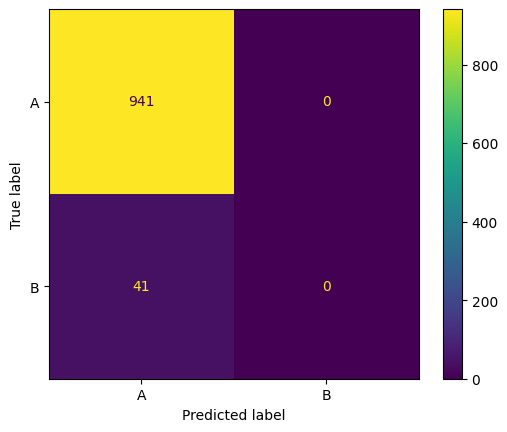

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm1=confusion_matrix(y_test,y_pred1)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm1 , display_labels = ['A','B'])
cm_display.plot()
plt.show()

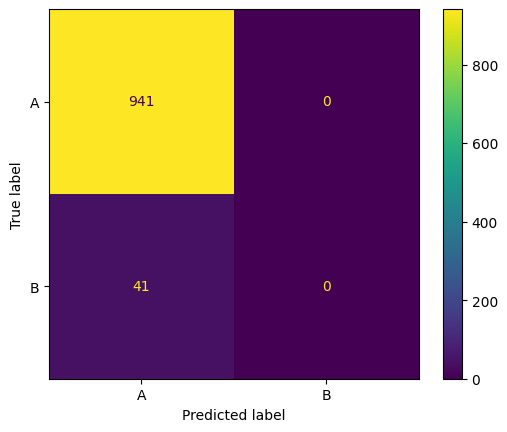

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm2=confusion_matrix(y_test,y_pred2)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels = ['A','B'])
cm_display.plot()
plt.show()

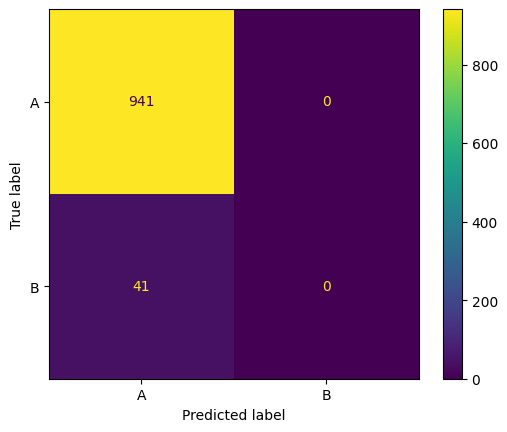

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm4=confusion_matrix(y_test,y_pred4)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm4 , display_labels = ['A','B'])
cm_display.plot()
plt.show()

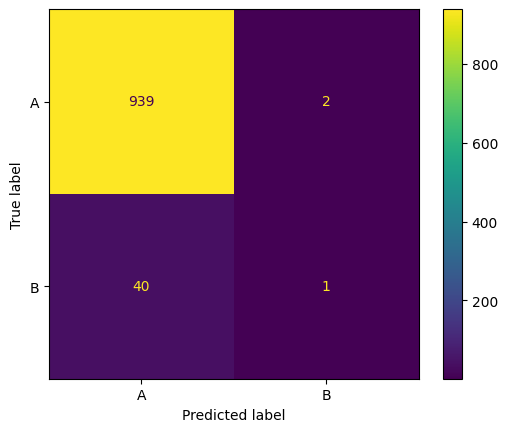

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm5=confusion_matrix(y_test,y_pred5)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm5 , display_labels = ['A','B'])
cm_display.plot()
plt.show()

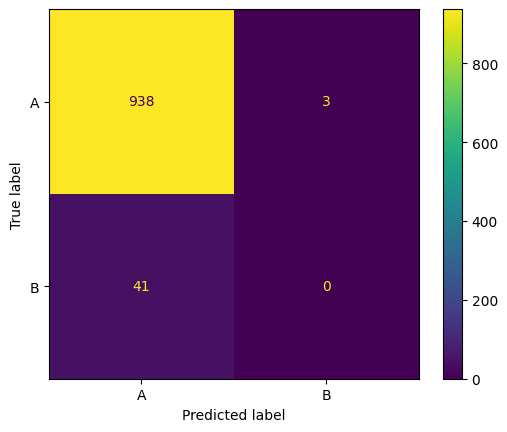

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm8=confusion_matrix(y_test,y_pred8)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm8 , display_labels = ['A','B'])
cm_display.plot()
plt.show()

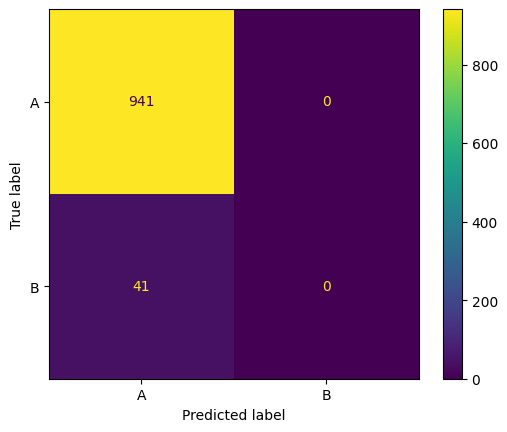

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm10=confusion_matrix(y_test,y_pred10)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm10 , display_labels = ['A','B'])
cm_display.plot()
plt.show()

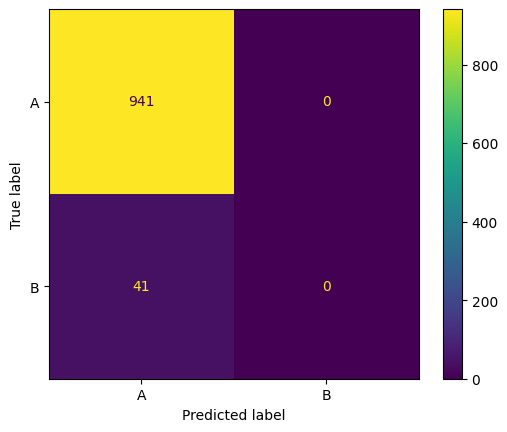

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm11=confusion_matrix(y_test,y_pred11)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm11 , display_labels = ['A','B'])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
for i in [y_pred1,y_pred2,y_pred3,y_pred4,y_pred5,y_pred6,y_pred7,y_pred8,y_pred9,y_pred10,y_pred11]:
  print(classification_report(y_test,i))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       941
           1       0.00      0.00      0.00        41

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       941
           1       0.00      0.00      0.00        41

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       941
           1       0.17      0.20      0.18        41

    accuracy                           0.93       982
   macro avg       0.57      0.58      0.57       982
weighted avg       0.93      0.93      0.93       982

              preci

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

#**Feature_importance**

In [ ]:
import numpy as np
feature_importance=pd.DataFrame(e.feature_importances_,index=x.columns,columns=['importance']).sort_values('importance')
feature_importance

,importance
heart_disease,0.014922
gender,0.022864
Residence_type,0.024228
ever_married,0.025725
hypertension,0.031556
work_type,0.051426
smoking_status,0.054251
bmi,0.185173
avg_glucose_level,0.216496
age,0.373359


In [ ]:
g=feature_importance.index
xf=pd.DataFrame(df,columns=g[6:])
xf


,smoking_status,bmi,avg_glucose_level,age
0,0,36.6,228.69,67.0
2,1,32.5,105.92,80.0
3,2,34.4,171.23,49.0
4,1,24.0,174.12,79.0
5,0,29.0,186.21,81.0
...,...,...,...,...
5104,3,18.6,103.08,13.0
5106,1,40.0,125.20,81.0
5107,1,30.6,82.99,35.0
5108,0,25.6,166.29,51.0


In [ ]:
yf=df['stroke']
yf

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4909, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xf,yf,test_size=0.20)

In [ ]:
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
st_x= StandardScaler()
st_y=MaxAbsScaler()
x_train1=st_y.fit(x_train)
x_train=x_train1.transform(x_train)
x_test1=st_y.fit(x_test)
x_test=x_test1.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
a=LogisticRegression()
a.fit(x_train,y_train)
ay_pred1=a.predict(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
b=KNeighborsClassifier()
b.fit(x_train,y_train)
ay_pred2=b.predict(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
c=DecisionTreeClassifier()
c.fit(x_train,y_train)
ay_pred3=c.predict(x_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
d=GaussianNB()
d.fit(x_train,y_train)
ay_pred4=d.predict(x_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
e=RandomForestClassifier()
e.fit(x_train,y_train)
ay_pred5=e.predict(x_test)

In [ ]:
from xgboost import XGBClassifier
f=XGBClassifier()
f.fit(x_train,y_train)
ay_pred6=f.predict(x_test)

In [ ]:
from sklearn.svm import SVC
h= SVC()
h.fit(st_x.fit_transform(x_train),y_train)
ay_pred7=h.predict(st_x.transform(x_test))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
AC=AdaBoostClassifier()
AC.fit(x_train,y_train)
ay_pred8=AC.predict(x_test)


In [ ]:
from sklearn.tree import ExtraTreeClassifier
j = ExtraTreeClassifier()
j.fit(x_train,y_train)
ay_pred9=j.predict(x_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
k = MLPClassifier()
k.fit(x_train,y_train)
ay_pred10=k.predict(x_test)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
l = MultinomialNB()
l.fit(x_train,y_train)
ay_pred11=l.predict(x_test)

In [ ]:

from sklearn.metrics import confusion_matrix,accuracy_score
pre=[ay_pred1,ay_pred2,ay_pred3,ay_pred4,ay_pred5,ay_pred6,ay_pred7,ay_pred8,ay_pred9,ay_pred10,ay_pred11]
acf=[accuracy_score(y_test,w) for w in pre]
cm=[confusion_matrix(y_test,w) for w in pre]
for i in pre:
  print(accuracy_score(y_test,i))


0.9613034623217923
0.960285132382892
0.8961303462321792
0.9490835030549898
0.9572301425661914
0.955193482688391
0.9613034623217923
0.9572301425661914
0.9409368635437881
0.9613034623217923
0.9613034623217923


In [ ]:
print(cm1,cm2,cm3,cm4,cm5,cm6,cm7,cm8,cm9,cm10,cm11,sep='\n')

[[941   0]
 [ 41   0]]
[[941   0]
 [ 41   0]]
[[903  38]
 [ 33   8]]
[[941   0]
 [ 41   0]]
[[939   2]
 [ 40   1]]
[[927  14]
 [ 38   3]]
[[749 192]
 [ 20  21]]
[[938   3]
 [ 41   0]]
[[902  39]
 [ 37   4]]
[[941   0]
 [ 41   0]]
[[941   0]
 [ 41   0]]


In [ ]:
from sklearn.metrics import classification_report
for i in [ay_pred1,ay_pred2,ay_pred3,ay_pred4,ay_pred5,ay_pred6,ay_pred7,ay_pred8,ay_pred9,ay_pred10,ay_pred11]:
  print(classification_report(y_test,i))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       944
           1       0.00      0.00      0.00        38

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       944
           1       0.40      0.05      0.09        38

    accuracy                           0.96       982
   macro avg       0.68      0.52      0.54       982
weighted avg       0.94      0.96      0.95       982

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       944
           1       0.14      0.34      0.20        38

    accuracy                           0.90       982
   macro avg       0.56      0.63      0.57       982
weighted avg       0.94      0.90      0.92       982

              preci

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
xf1=pd.DataFrame(df,columns=g[6:])
yf1=df['stroke']
x=xf1
y=yf1

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [ ]:
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
st_x= StandardScaler()
st_y=MaxAbsScaler()
x_train1=st_y.fit(x_train)
x_train=x_train1.transform(x_train)
x_test1=st_y.fit(x_test)
x_test=x_test1.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
a=LogisticRegression(C=1.0,penalty='l2',solver='newton-cg')
a.fit(x_train,y_train)
aay_pred1=a.predict(x_test)

In [ ]:
# example of grid searching key hyperparametres for KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.955438 using {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'}
0.927340 (0.007499) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.927340 (0.007499) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.947035 (0.006377) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.943724 (0.006278) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.950515 (0.004075) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.947798 (0.003974) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.952297 (0.002522) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.948732 (0.003573) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.954164 (0.001845) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.950854 (0.003653) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.955098 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
b=KNeighborsClassifier(metric= 'euclidean', n_neighbors= 13, weights= 'uniform')
b.fit(x_train,y_train)
aay_pred2=b.predict(x_test)

In [ ]:
# example of grid searching key hyperparametres for KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# define models and parameters
model = DecisionTreeClassifier()
splitter=['best','random']
max_features = ['sqrt', 'log2']
criterion=['gini','entropy','log_loss']
class_weight=['balanced','balanced_subsample']
# define grid search
grid = dict(splitter=splitter,max_features=max_features,criterion=criterion,class_weight=class_weight)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.925387 using {'class_weight': 'balanced', 'criterion': 'log_loss', 'max_features': 'log2', 'splitter': 'best'}
0.923607 (0.010279) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'best'}
0.921656 (0.010720) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'random'}
0.923434 (0.010669) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'log2', 'splitter': 'best'}
0.922079 (0.007840) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'log2', 'splitter': 'random'}
0.923606 (0.011234) with: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}
0.922250 (0.012066) with: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'random'}
0.921736 (0.010052) with: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'log2', 'splitter': 'best'}
0.923609 (0.009511) with: 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

In [ ]:
from sklearn.tree import DecisionTreeClassifier
c=DecisionTreeClassifier(class_weight= 'balanced', criterion= 'log_loss', max_features= 'log2', splitter= 'best')
c.fit(x_train,y_train)
aay_pred3=c.predict(x_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
d=GaussianNB(var_smoothing= 1.0)
d.fit(x_train,y_train)
aay_pred4=d.predict(x_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
e=RandomForestClassifier(max_depth=2, n_estimators=30,
    min_samples_split=3, max_leaf_nodes=5,
    random_state=22)
e.fit(x_train,y_train)
aay_pred5=e.predict(x_test)

In [ ]:
from xgboost import XGBClassifier
f=XGBClassifier()
f.fit(x_train,y_train)
aay_pred6=f.predict(x_test)

In [ ]:
from sklearn.svm import SVC
h= SVC(C= 50, class_weight= 'balanced', decision_function_shape= 'ovo', gamma= 'scale', kernel= 'rbf')
h.fit(x_train,y_train)
aay_pred7=h.predict(x_test)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
AC=AdaBoostClassifier()
AC.fit(x_train,y_train)
aay_pred8=AC.predict(x_test)


In [ ]:
from sklearn.tree import ExtraTreeClassifier
j = ExtraTreeClassifier(ccp_alpha= 0, class_weight= 'balanced', criterion= 'log_loss', max_features= 'sqrt')
j.fit(x_train,y_train)
aay_pred9=j.predict(x_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
k = MLPClassifier(activation= 'relu', learning_rate= 'adaptive', solver= 'adam')
k.fit(x_train,y_train)
aay_pred10=k.predict(x_test)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
l = MultinomialNB()
l.fit(x_train,y_train)
aay_pred11=l.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
for i in [aay_pred1,aay_pred2,aay_pred3,aay_pred4,aay_pred5,aay_pred6,aay_pred7,aay_pred8,aay_pred9,aay_pred10,aay_pred11]:
  print(accuracy_score(y_test,i))
LR=accuracy_score(y_test,aay_pred1)
KNN=accuracy_score(y_test,aay_pred2)
DTC=accuracy_score(y_test,aay_pred3)
GNB=accuracy_score(y_test,aay_pred4)
RFC=accuracy_score(y_test,aay_pred5)
XGB=accuracy_score(y_test,aay_pred6)
SVC=accuracy_score(y_test,aay_pred7)
ABC=accuracy_score(y_test,aay_pred8)
EXT=accuracy_score(y_test,aay_pred9)
MLP=accuracy_score(y_test,aay_pred10)
MNB=accuracy_score(y_test,aay_pred11)

0.9643584521384929
0.9643584521384929
0.9307535641547862
0.9643584521384929
0.9643584521384929
0.9531568228105907
0.8004073319755601
0.9429735234215886
0.929735234215886
0.9643584521384929
0.9643584521384929


In [ ]:
cm1=confusion_matrix(y_test,aay_pred1)
cm2=confusion_matrix(y_test,aay_pred2)
cm3=confusion_matrix(y_test,aay_pred3)
cm4=confusion_matrix(y_test,aay_pred4)
cm5=confusion_matrix(y_test,aay_pred5)
cm6=confusion_matrix(y_test,aay_pred6)
cm7=confusion_matrix(y_test,aay_pred7)
cm8=confusion_matrix(y_test,aay_pred8)
cm8=confusion_matrix(y_test,aay_pred9)
cm8=confusion_matrix(y_test,aay_pred10)
cm8=confusion_matrix(y_test,aay_pred11)

In [ ]:
acc = [LR,KNN, DTC,GNB,RFC,XGB,SVC,ABC,EXT,MLP,MNB]
models = ['LR','KNN','DT', 'GNB', 'RF','XGB' ,'SVM' ,'ABC','EXT','MLP','MNB']

<Axes: xlabel='algorithm', ylabel='accuracy'>

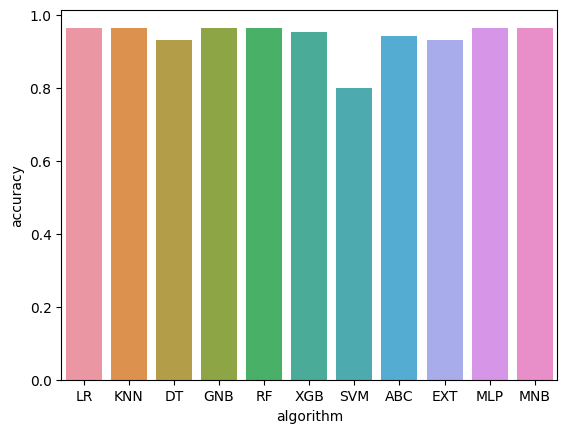

In [ ]:
import seaborn as sns

sns.barplot(data=pd.DataFrame({"algorithm":models,"accuracy":acc}),x="algorithm",y="accuracy")

In [ ]:
print(cm1,cm2,cm3,cm4,cm5,cm6,cm7,cm8,cm9,cm10,cm11,sep='\n')

[[947   0]
 [ 35   0]]
[[947   0]
 [ 35   0]]
[[913  34]
 [ 34   1]]
[[947   0]
 [ 35   0]]
[[947   0]
 [ 35   0]]
[[936  11]
 [ 35   0]]
[[781 166]
 [ 30   5]]
[[947   0]
 [ 35   0]]
[[902  39]
 [ 37   4]]
[[948   0]
 [ 34   0]]
[[948   0]
 [ 34   0]]


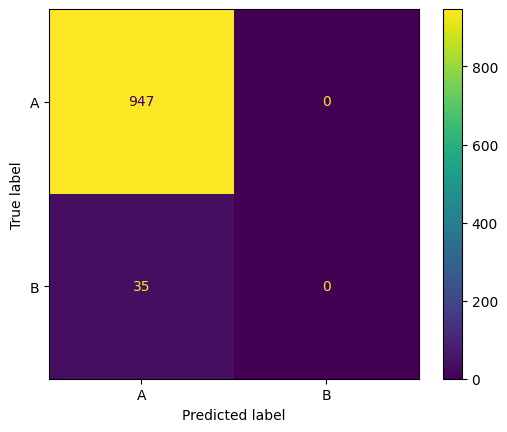

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm1=confusion_matrix(y_test,aay_pred1)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm1 , display_labels = ['A','B'])
cm_display.plot()
plt.show()

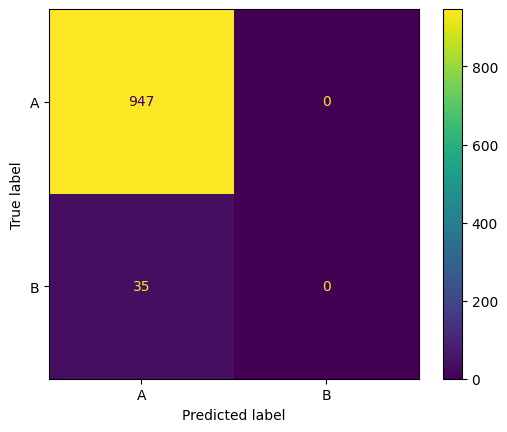

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm2=confusion_matrix(y_test,aay_pred2)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm2 , display_labels = ['A','B'])
cm_display.plot()
plt.show()

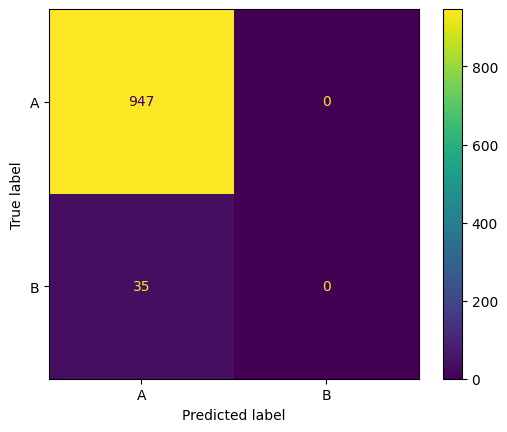

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm4=confusion_matrix(y_test,aay_pred4)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm4 , display_labels = ['A','B'])
cm_display.plot()
plt.show()

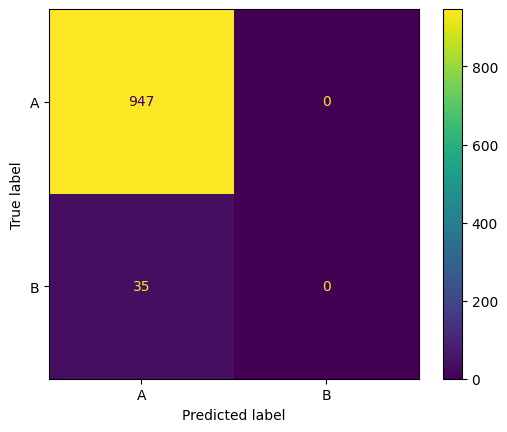

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm5=confusion_matrix(y_test,aay_pred5)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm5 , display_labels = ['A','B'])
cm_display.plot()
plt.show()

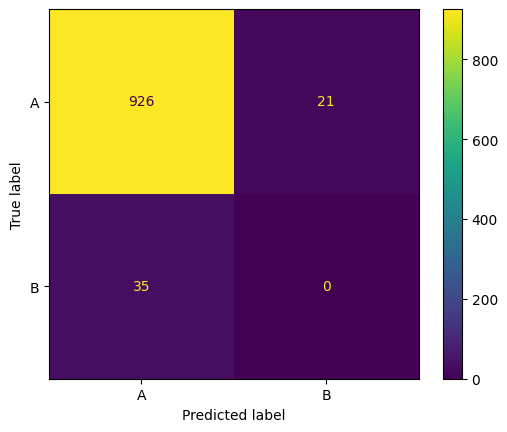

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm8=confusion_matrix(y_test,aay_pred8)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm8 , display_labels = ['A','B'])
cm_display.plot()
plt.show()

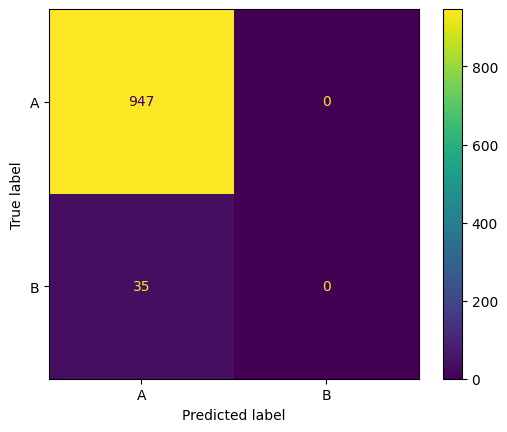

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm10=confusion_matrix(y_test,aay_pred10)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm10 , display_labels = ['A','B'])
cm_display.plot()
plt.show()

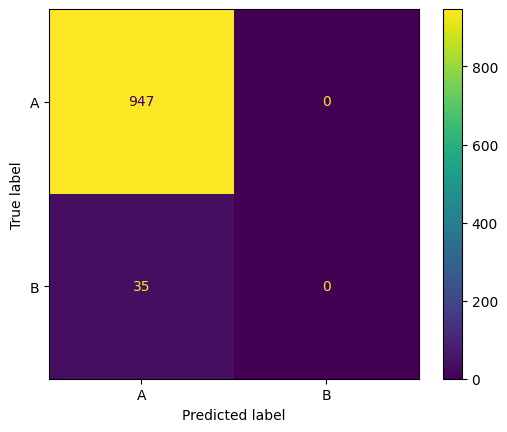

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm11=confusion_matrix(y_test,aay_pred11)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm11 , display_labels = ['A','B'])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
for i in [aay_pred1,aay_pred2,aay_pred3,aay_pred4,aay_pred5,aay_pred6,aay_pred7,aay_pred8,aay_pred9,aay_pred10,aay_pred11]:
  print(classification_report(y_test,i))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       947
           1       0.00      0.00      0.00        35

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.93      0.96      0.95       982

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       947
           1       0.00      0.00      0.00        35

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.93      0.96      0.95       982

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       947
           1       0.03      0.03      0.03        35

    accuracy                           0.93       982
   macro avg       0.50      0.50      0.50       982
weighted avg       0.93      0.93      0.93       982

              preci

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xf, yf, test_size=0.20)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
Results=pd.DataFrame({'Actual':y_test})
column=pd.DataFrame({'Predictions':y_pred})
Results=Results.join(column.set_index(Results.index))
Results.head(5)

,Actual,Predictions
2603,0,0
2029,0,0
4894,0,0
2055,0,0
451,0,0


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9541751527494908


In [ ]:
y_pred1=rf.predict(x_train)
print(accuracy_score(y_train,y_pred1))

1.0


In [ ]:
xf=pd.DataFrame(df,columns=g[5:])
xf


,work_type,smoking_status,bmi,avg_glucose_level,age
0,1,0,36.6,228.69,67.0
2,1,1,32.5,105.92,80.0
3,1,2,34.4,171.23,49.0
4,0,1,24.0,174.12,79.0
5,1,0,29.0,186.21,81.0
...,...,...,...,...,...
5104,3,3,18.6,103.08,13.0
5106,0,1,40.0,125.20,81.0
5107,0,1,30.6,82.99,35.0
5108,1,0,25.6,166.29,51.0


In [ ]:
yf=df['stroke']
yf

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4909, dtype: int64

#**Controlling Overfitting**

In [ ]:
x=xf
y=yf

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(x,
                                                  y,
                                                  test_size = 0.2,
                                                  random_state=2022)
print(X_train.shape, X_val.shape)

(3927, 5) (982, 5)


In [ ]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
print('Training Accuracy : ',
      metrics.accuracy_score(Y_train,
                             model.predict(X_train))*100)
print('Validation Accuracy : ',
      metrics.accuracy_score(Y_val,
                             model.predict(X_val))*100)

Training Accuracy :  100.0
Validation Accuracy :  95.72301425661914


In [ ]:
model = RandomForestClassifier(max_depth=2,
                               random_state=22)
model.fit(X_train, Y_train)
print('Training Accuracy : ',
      metrics.accuracy_score(Y_train,
                             model.predict(X_train))*100)
print('Validation Accuracy : ',
      metrics.accuracy_score(Y_val,
                             model.predict(X_val))*100)

Training Accuracy :  95.72192513368985
Validation Accuracy :  95.82484725050917


In [ ]:
model = RandomForestClassifier(n_estimators=30,
                               random_state=22)
model.fit(X_train, Y_train)
print('Training Accuracy : ',
      metrics.accuracy_score(Y_train,
                             model.predict(X_train))*100)
print('Validation Accuracy : ',
      metrics.accuracy_score(Y_val,
                             model.predict(X_val))*100)

Training Accuracy :  99.87267634326457
Validation Accuracy :  95.5193482688391


In [ ]:
model = RandomForestClassifier(
    max_depth=2, n_estimators=30,
    min_samples_split=3, max_leaf_nodes=5,
    random_state=22)

model.fit(X_train, Y_train)
print('Training Accuracy : ',
      metrics.accuracy_score(
          Y_train, model.predict(X_train))*100)

print('Validation Accuracy : ', metrics.accuracy_score(
    Y_val, model.predict(X_val))*100)

Training Accuracy :  95.72192513368985
Validation Accuracy :  95.82484725050917
